In [1]:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read csv file and convert into dataframe
df = pd.read_csv("Japan_used_cars_datasets.csv")
df.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


### Observations about columns
Firstly, we explore the Japan used car dataset.

ID - it shows the serial nos, no need of this column.

Price - it shows the sale price of the vehicle in the ad.

mark - it shows the brand of car.

model - it shows model of the vehicle.

year - it shows the vehicle registration year.

mileage - it shows miles traveled by vehicle. 

engine_capacity - it shows the measurement of the total volume of the cylinders in the engine.

transmission - it shows the type of gearbox used by the car.

drive - it shows the wheel drive(2wd, 4wd and awd)

Hand drive- it shows  the Left-hand traffic (LHT) and right-hand traffic (RHT)
 
fuel - it shows the type of fuel used by the car( gasoline, diesel, hybrid, lpg and cng)

These are the features of this dataset


In [3]:
# let's check the shape of this dataset
df.shape

(2318, 11)

We have 2318 rows and 11 columns

In [4]:
df.columns

Index(['id', 'price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

In [5]:
# let's check the null values
df.isnull().sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

In [6]:
# let's check the unique values of all columns
df.nunique()


id                 2318
price               354
mark                 28
model               258
year                 30
mileage            1367
engine_capacity      93
transmission          3
drive                 3
hand_drive            3
fuel                  5
dtype: int64

In [7]:
# summary about all columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2318 non-null   int64 
 1   price            2318 non-null   int64 
 2   mark             2318 non-null   object
 3   model            2318 non-null   object
 4   year             2318 non-null   int64 
 5   mileage          2318 non-null   int64 
 6   engine_capacity  2318 non-null   int64 
 7   transmission     2318 non-null   object
 8   drive            2318 non-null   object
 9   hand_drive       2318 non-null   object
 10  fuel             2318 non-null   object
dtypes: int64(5), object(6)
memory usage: 199.3+ KB


There is no null values present in dataset and mark,model,transmission,drive,hand drive and fuel columns are object type data so we have to convert into numbers .we use encoding techniques

In [8]:
#lets replace the transmission values
df['transmission'].unique()

array(['at', 'mt', 'cvt'], dtype=object)

In [9]:
df['transmission'] = df['transmission'].replace({'at':1,'mt':2,'cvt':3})

In [10]:
# let's replace the drive values
df['drive'].unique()

array(['2wd', '4wd', 'awd'], dtype=object)

In [11]:
df['drive']= df['drive'].replace({'2wd':1,'4wd':2,'awd':3})

In [12]:
# let's replace the hand drive values
df['hand_drive'].unique()

array(['rhd', 'center', 'lhd'], dtype=object)

In [13]:
df['hand_drive'] = df['hand_drive'].replace({'rhd':1,'center':2,'lhd':3})

In [14]:
# let's replace the fuel values
df['fuel'].unique()

array(['gasoline', 'diesel', 'hybrid', 'lpg', 'cng'], dtype=object)

In [15]:
df['fuel'] = df['fuel'].replace({'gasoline':1,'diesel':2,'hybrid':3,'lpg':4,'cng':5})

In [16]:
df.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,1,1,1,1
1,1,110,nissan,march,2010,53000,1200,1,1,1,1
2,2,165,nissan,lafesta,2005,47690,2000,1,1,1,1
3,3,190,toyota,avensis,2008,130661,1990,1,1,1,1
4,4,190,daihatsu,mira,2006,66300,660,1,1,1,1


In [17]:
# let's check if there are any duplicates
df.drop_duplicates(inplace = True)

In [18]:
df.shape

(2318, 11)

There are no duplicates present in this dataset

In [19]:
# stats about data
df.describe()

,id,price,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1169.047023,971.522433,2005.972390,100013.194996,1507.010785,1.076359,1.087144,1.014236,1.020276
std,674.460724,288.673112,3.698863,52512.478883,549.585170,0.310571,0.289655,0.166885,0.211910
min,0.000000,80.000000,1979.000000,2000.000000,9.000000,1.000000,1.000000,1.000000,1.000000
25%,583.250000,776.000000,2004.000000,67000.000000,1300.000000,1.000000,1.000000,1.000000,1.000000
50%,1168.500000,1000.000000,2006.000000,94000.000000,1490.000000,1.000000,1.000000,1.000000,1.000000
75%,1753.750000,1213.000000,2009.000000,124000.000000,1800.000000,1.000000,1.000000,1.000000,1.000000
max,2335.000000,1400.000000,2015.000000,790000.000000,12340.000000,3.000000,3.000000,3.000000,5.000000


year - Mean & STD are close to each others

mileage - Max value of mileage is indicating the presence of outliers. 

engine_capacity - Max value of engine capacity is indicating the presence of outliers.

transmission - Mean & STD are close to each others

drive - Measure of central Tendency and Dispersion is looking satisfactory
 
fuel - Measure of central Tendency and Dispersion is looking satisfactory


# EDA

<AxesSubplot:xlabel='year', ylabel='price'>

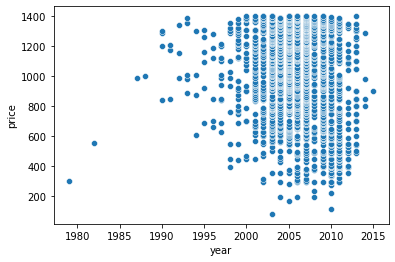

In [20]:
# let's visualize the relationship between year and price
sns.scatterplot(x = 'year',y = 'price',data = df)


### we can clearly see the year is equally distributed in the range 2000 to 2015

<AxesSubplot:xlabel='price', ylabel='mileage'>

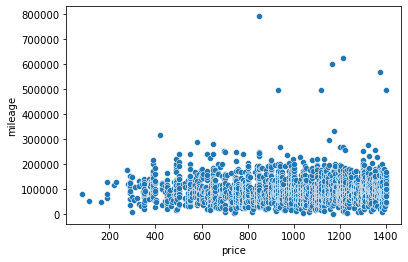

In [21]:
# let's visualize the relationship between mileage and price
sns.scatterplot(x = 'price',y = 'mileage',data = df)


In [22]:
df['mileage'].mean()

100013.19499568593

### we can clearly see the mileage is equally distributed in the range 50000 to 200000 and the avg mileage of used car is 100013

<AxesSubplot:xlabel='price', ylabel='fuel'>

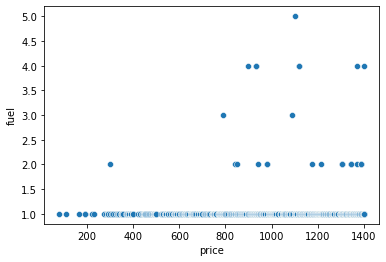

In [23]:
# let's visualize the relationship between fuel and price
sns.scatterplot(x = 'price', y= 'fuel',data = df,)

In [24]:
df['fuel'].value_counts()

1    2290
2      18
4       7
3       2
5       1
Name: fuel, dtype: int64

### gasoline fuel is used most of the cars , diesel fuel is used in 18 cars,CNG fuel is used in 7 cars , hybrid is used in 2 cars and lpg fuel used in only 1 car

<AxesSubplot:xlabel='transmission', ylabel='price'>

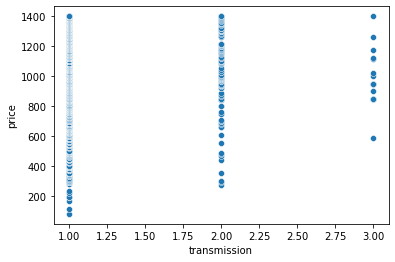

In [25]:
# let's visualize the relationship between transmission and price
sns.scatterplot(x= 'transmission',y = 'price',data = df)

In [26]:
df['transmission'].value_counts()

1    2171
2     117
3      30
Name: transmission, dtype: int64

### most of the car used automatic transmission, manual transmission used in 117 cars and least no of cars are used CVT

<AxesSubplot:xlabel='engine_capacity', ylabel='price'>

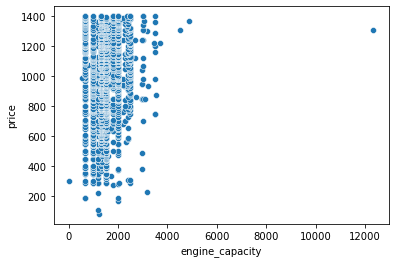

In [27]:
# let's visualize the relationship between engine capacity and price
sns.scatterplot(x ='engine_capacity',y='price',data = df)

### we can clearly see the engine capacity is equally distributed in the range 1000cc to 2500cc

<AxesSubplot:xlabel='drive', ylabel='price'>

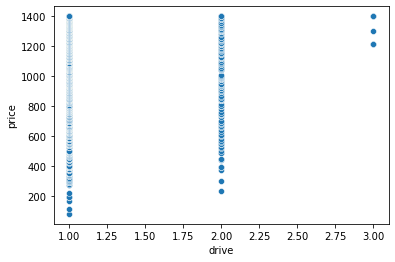

In [28]:
# let's visualize the relationship between drive and price
sns.scatterplot(x='drive',y = 'price',data = df)

In [29]:
df['drive'].value_counts()

1    2121
2     192
3       5
Name: drive, dtype: int64

### most of the car used '2 wheels drive' , '4 wheels drive used in 192 cars and 'all wheels drive' used in only 5 cars

<AxesSubplot:xlabel='hand_drive', ylabel='price'>

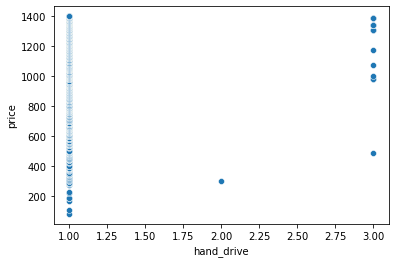

In [30]:
# let's visualize the relationship between hand drive and price
sns.scatterplot(x = 'hand_drive',y = 'price',data = df)

In [31]:
df['hand_drive'].value_counts()

1    2301
3      16
2       1
Name: hand_drive, dtype: int64

### most of cars used  'right hand drive' ,'left hand drive' used in 16 cars and only one car is used 'center drive'

# Correlation

In [32]:
# let's check the corelation
df.corr()

,id,price,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
id,1.000000,0.985100,-0.188326,0.028091,0.169773,0.014771,0.046394,0.066145,0.046944
price,0.985100,1.000000,-0.211092,0.021581,0.173748,0.022787,0.046591,0.058517,0.046505
year,-0.188326,-0.211092,1.000000,0.086065,-0.142460,-0.234106,-0.241064,-0.062988,-0.065911
mileage,0.028091,0.021581,0.086065,1.000000,0.130362,0.023681,0.116351,0.014595,0.167041
engine_capacity,0.169773,0.173748,-0.142460,0.130362,1.000000,-0.107955,0.055608,0.064993,0.091162
transmission,0.014771,0.022787,-0.234106,0.023681,-0.107955,1.000000,0.161085,0.003998,0.015812
drive,0.046394,0.046591,-0.241064,0.116351,0.055608,0.161085,1.000000,0.001109,-0.000673
hand_drive,0.066145,0.058517,-0.062988,0.014595,0.064993,0.003998,0.001109,1.000000,0.296935
fuel,0.046944,0.046505,-0.065911,0.167041,0.091162,0.015812,-0.000673,0.296935,1.000000


In [33]:
# let's check the correation with price
df.corr()['price'].sort_values

<bound method Series.sort_values of id                 0.985100
price              1.000000
year              -0.211092
mileage            0.021581
engine_capacity    0.173748
transmission       0.022787
drive              0.046591
hand_drive         0.058517
fuel               0.046505
Name: price, dtype: float64>

<AxesSubplot:>

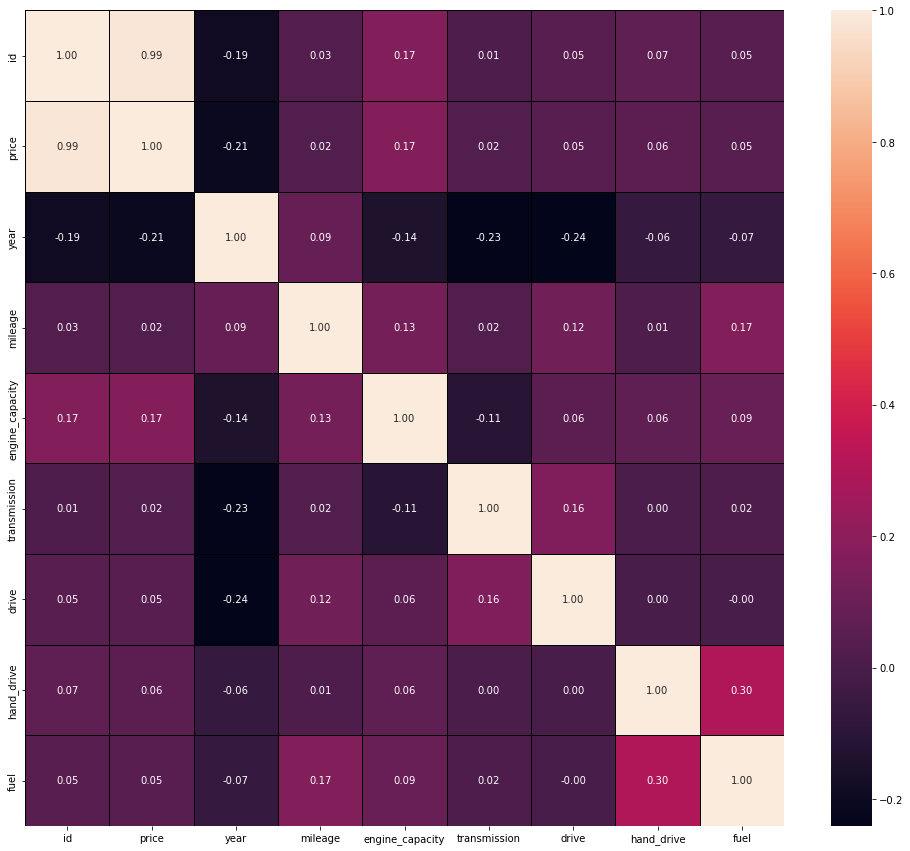

In [34]:
# let's check correlation using heatmap
plt.figure(figsize=(17,15))
sns.heatmap(df.corr(),annot =True,linewidth = 0.5,linecolor = 'black',fmt  = '.2f')

- All columns are positively correlated with price.
- year column is negatively correlated with price so we drop the column
- Maximum correlation:- engine_capacity

In [35]:
df.drop('year',axis =1 , inplace = True)

In [36]:
df.head()

,id,price,mark,model,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,80000,1240,1,1,1,1
1,1,110,nissan,march,53000,1200,1,1,1,1
2,2,165,nissan,lafesta,47690,2000,1,1,1,1
3,3,190,toyota,avensis,130661,1990,1,1,1,1
4,4,190,daihatsu,mira,66300,660,1,1,1,1


In [37]:
# let's drop the unnecessary columns from this dataset
df.drop(columns = ['mark','model'],axis = 1,inplace = True)

In [38]:
df.head()

,id,price,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,80000,1240,1,1,1,1
1,1,110,53000,1200,1,1,1,1
2,2,165,47690,2000,1,1,1,1
3,3,190,130661,1990,1,1,1,1
4,4,190,66300,660,1,1,1,1


Now, looks better

## Outliers checking

### According to my Pre observation on data i suspected outliers in mileage and engine capacity columns now,  i am checking the outliers by plotting BOX PLOT 

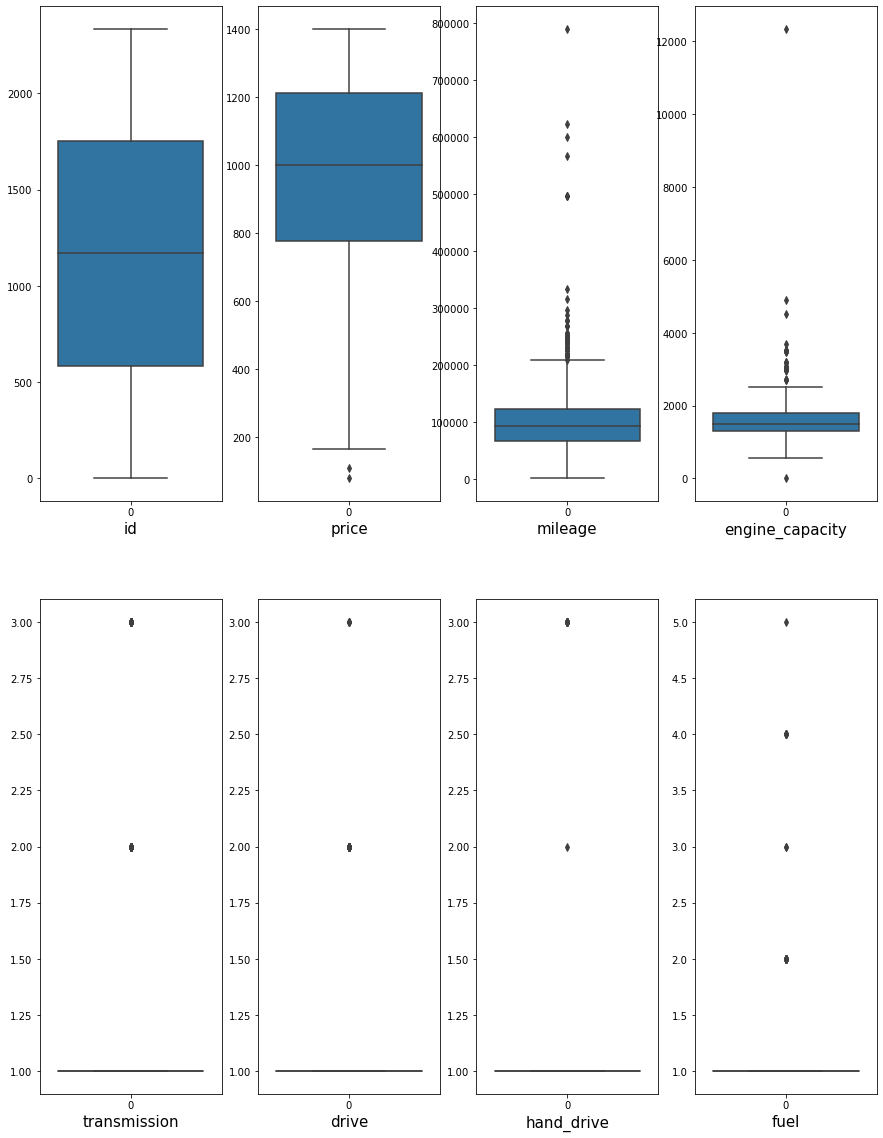

In [39]:
# let's visualize the outliers using boxplot
plt.figure(figsize = (15,20))
pn = 1
for col in df:
    if pn <= 8:
        plt.subplot(2,4,pn)
        ax=sns.boxplot(data = df[col])
        plt.xlabel(col,fontsize= 15)
    pn += 1
plt.show()    

#### As expected mileage and engine capacity are having outliers ,Lets treat with outliers first...........

## skewness

In [40]:
df.skew()

id                 -0.002276
price              -0.466780
mileage             3.089142
engine_capacity     4.038892
transmission        4.394841
drive               3.193137
hand_drive         11.732242
fuel               12.739754
dtype: float64

## Normal Distribution curve for every individual column

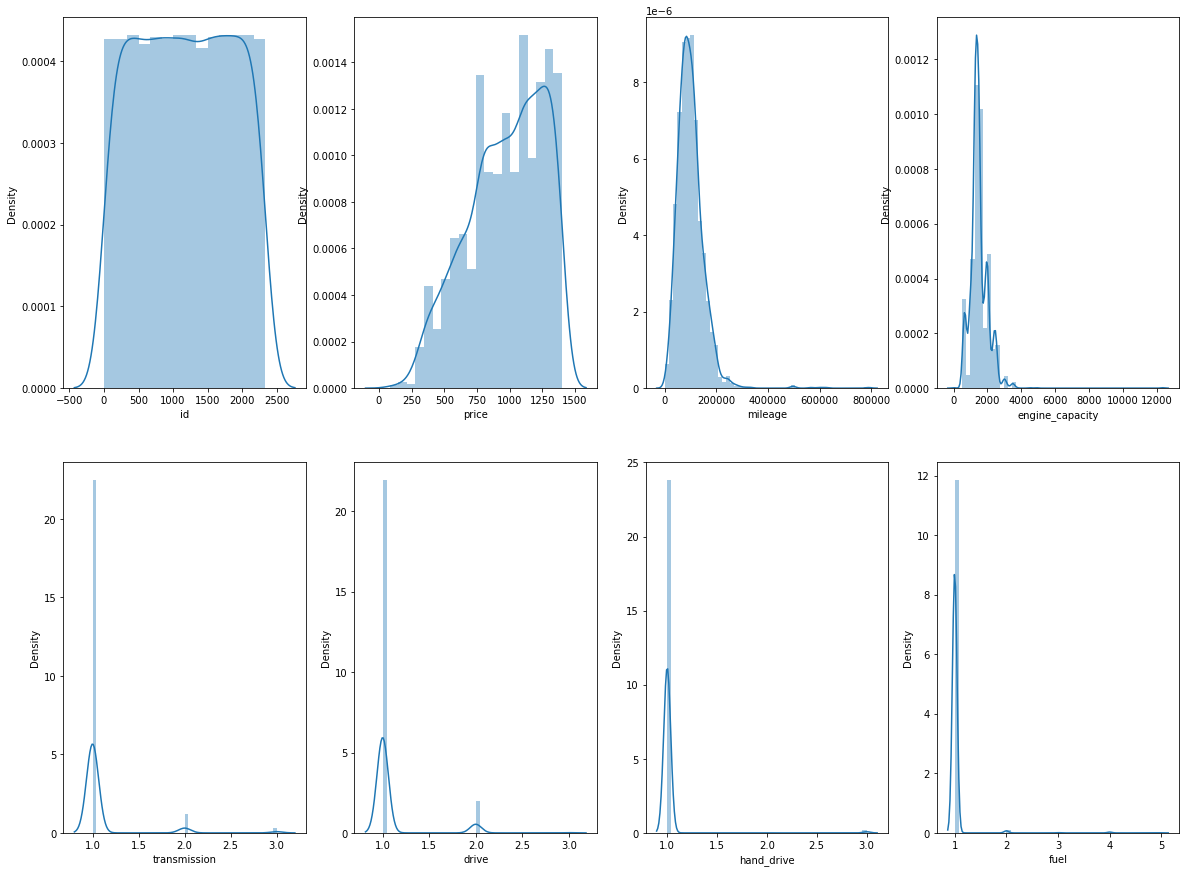

In [41]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in df:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        
    plotnumber+=1
    
plt.show()    

 Year, mileage and engine capacity is not normally distributed

# Data Preprocessing

### Removing outliers

Z- score technique

In [42]:
from scipy.stats import zscore
z_score = zscore(df[['mileage','engine_capacity']])

In [43]:
z = np.abs(z_score)

In [44]:
z.shape

(2318, 2)

In [45]:
threshold = 3
print(np.where(z>3))

(array([   7,  103,  268,  359,  507,  508,  811,  842,  958,  971, 1001,
       1084, 1459, 1572, 1582, 1587, 1609, 1668, 1670, 1672, 1713, 1729,
       1772, 1779, 1942, 1984, 2026, 2037, 2070, 2188, 2210, 2210, 2306,
       2310], dtype=int64), array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0], dtype=int64))


In [46]:
len(np.where(z>3)[0])

34

In [47]:
z.iloc[4]

mileage            0.642142
engine_capacity    1.541515
Name: 4, dtype: float64

In [48]:
df_new = df[(z<3).all(axis=1)]
print("Old Dataframe",df.shape)
print("New Dataframe",df_new.shape)
print("Total dropped rows",df.shape[0] - df_new.shape[0])

Old Dataframe (2318, 8)
New Dataframe (2285, 8)
Total dropped rows 33


## Percentage data loss

In [50]:
loss_percent = (2318-2285)/2318*100
print(loss_percent,'%')

1.4236410698878343 %


Checking whether how much outliers are still there

### Dividing data in features and label

In [51]:
x = df_new.drop('price',axis = 1)

In [52]:
x.head()

,id,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80000,1240,1,1,1,1
1,1,53000,1200,1,1,1,1
2,2,47690,2000,1,1,1,1
3,3,130661,1990,1,1,1,1
4,4,66300,660,1,1,1,1


In [53]:
y = df_new['price']

### Transforming data to removing skewness

In [54]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')
x

array([[-2.18566250e+00, -3.14540912e-01, -4.73142404e-01, ...,
        -3.02015030e-01,  0.00000000e+00, -3.46944695e-18],
       [-2.17573063e+00, -1.04238865e+00, -5.66298861e-01, ...,
        -3.02015030e-01,  0.00000000e+00, -3.46944695e-18],
       [-2.16722422e+00, -1.20345469e+00,  1.09289833e+00, ...,
        -3.02015030e-01,  0.00000000e+00, -3.46944695e-18],
       ...,
       [ 1.55496679e+00,  1.78518822e-01, -2.00212767e+00, ...,
        -3.02015030e-01,  0.00000000e+00, -3.46944695e-18],
       [ 1.55610301e+00,  1.54327282e+00, -2.00212767e+00, ...,
         3.31109420e+00,  0.00000000e+00, -3.46944695e-18],
       [ 1.55723909e+00, -5.08810141e-01,  2.78261275e+00, ...,
        -3.02015030e-01,  0.00000000e+00, -3.46944695e-18]])

In [55]:
pd.DataFrame(x).skew().sort_values()

0   -0.285439
1   -0.000410
5    0.000000
6    0.000000
2    0.048629
4    3.011057
3    3.598933
dtype: float64

Every value will be reduced after transformation

In [56]:
df_new.head()

,id,price,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,80000,1240,1,1,1,1
1,1,110,53000,1200,1,1,1,1
2,2,165,47690,2000,1,1,1,1
3,3,190,130661,1990,1,1,1,1
4,4,190,66300,660,1,1,1,1


## Best Random State

In [57]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [118]:
# maximum accuracy
max_accu = 0
# best random state value for which max accuracy is achived
max_rs = 0
for i in range(1,2000):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.20,random_state = i)
    gbr = GradientBoostingRegressor()
    gbr.fit(x_train,y_train)
    y_pred = gbr.predict(x_train)
    score1 = r2_score(y_train,y_pred)
    pred = gbr.predict(x_test)
    score=r2_score(y_test,pred)
    print('training score',score1,'testing score',score,'random state',i)
    if (score and score1) > max_accu:
        max_accu = score
        max_rs = i
        print('testing score',score,'random state',i)
    

training score 0.24906610826606124 testing score 0.06282964271348013 random state 1
testing score 0.06282964271348013 random state 1
training score 0.23720475245976502 testing score 0.07970410784807602 random state 2
testing score 0.07970410784807602 random state 2
training score 0.24298119389849315 testing score 0.10307947268324114 random state 3
testing score 0.10307947268324114 random state 3
training score 0.24069845004963886 testing score 0.09827607584878073 random state 4
testing score 0.09827607584878073 random state 4
training score 0.2457580834114007 testing score 0.055328754865412444 random state 5
testing score 0.055328754865412444 random state 5
training score 0.2502966844954122 testing score 0.07877298030909086 random state 6
testing score 0.07877298030909086 random state 6
training score 0.23994972505658996 testing score 0.06717680823375305 random state 7
testing score 0.06717680823375305 random state 7
training score 0.24632459141787677 testing score 0.04242749580622396 

## Train Test Split

In [58]:
#split data into train and test, model will be build on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20,random_state = 82)


##  Model training

In [122]:
# creating object for LinearRegression model
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [123]:
# let's check how well model fit on train data
lr.score(x_train,y_train)

0.9944094586690846

In [124]:
# let's check how well model fits on test data
lr.score(x_test,y_test)

0.9949033364422981

In [125]:
# predict the training score
x_pred=lr.predict(x_train)
r2_score(y_train,x_pred)

0.9944094586690846

In [126]:
# predict the model
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.9949033364422981

#### Lets check overall error of Model using MAE,MSE,RMSE

In [127]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [128]:
mean_absolute_error(y_test,y_pred)

13.63349791356475

In [129]:
mean_squared_error(y_test,y_pred)

399.79193371267087

In [130]:
##Root mean squared error
np.sqrt(399.79
)

19.99474931075656

## Cross validation for LinearRegression

In [136]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
Lassocv=LassoCV(max_iter=200,normalize=True)
Lassocv.fit(x_train,y_train)
alpha_num = Lassocv.alpha_
lasso_reg = Lasso(alpha_num)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_train,y_train)
print('Testing score',lasso_reg.score(x_test,y_test))

Testing score 0.9949021485399092


### Difference between model accuracy and cross validation accuracy score is 0

##  Model building using Random Forest

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [138]:
# initiate the object for random forest
rf = RandomForestRegressor()
# model training
rf.fit(x_train,y_train)

RandomForestRegressor()

In [139]:
print("Training score without hyperparameter tuning is======",rf.score(x_train,y_train))

Training score without hyperparameter tuning is====== 0.9999866448253428


In [140]:
pred = rf.predict(x_test)
print("testing score without hyperparameter tuning is======",r2_score(y_test,pred))

testing score without hyperparameter tuning is====== 0.9999780655123987


## Cross validation for RandomForest

In [167]:
Lassocv=LassoCV(max_iter=200,normalize=True)
Lassocv.fit(x_train,y_train)
alpha_num = Lassocv.alpha_
lasso_reg = Lasso(alpha_num)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_train,y_train)
print('Testing score',lasso_reg.score(x_test,y_test))

Testing score 0.9949021485399092


### Difference between model accuracy and cross validation accuracy score is 0.5


## Model building using Gradient Boosting Regressor

In [168]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [169]:
print("Training score without hyperparameter tuning is======",gbr.score(x_train,y_train))
y_predict = gbr.predict(x_test)
print("Testing score without Hyperparameter Tuning is",r2_score(y_test,y_predict))

Training score without hyperparameter tuning is====== 0.9999839587587543
Testing score without Hyperparameter Tuning is 0.9999506079587409


## Cross validation for GradientBossting


In [171]:
Lassocv=LassoCV(max_iter=200,normalize=True)
Lassocv.fit(x_train,y_train)
alpha_num = Lassocv.alpha_
lasso_reg = Lasso(alpha_num)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_train,y_train)
print('Testing score',lasso_reg.score(x_test,y_test))

Testing score 0.9949021485399092


### Difference between model accuracy and cross validation accuracy score is 0.5

### Hyperparameter Tuning

In [172]:
params={'min_samples_split':[2,3,4],
       'min_samples_leaf':[2,3,4],
       'max_depth':[2,3,4],
       'learning_rate':[0.1,0.2,0.3]}

In [173]:
rndn_search = RandomizedSearchCV(GradientBoostingRegressor(),cv=5,param_distributions=params)
rndn_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3],
                                        'max_depth': [2, 3, 4],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [2, 3, 4]})

In [174]:
rndn_search.best_estimator_

GradientBoostingRegressor(learning_rate=0.3, max_depth=4, min_samples_leaf=2)

In [175]:
gbr=GradientBoostingRegressor(learning_rate=0.01, max_depth=2, min_samples_leaf=3,min_samples_split=4)
gbr.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=2, min_samples_leaf=3,
                          min_samples_split=4)

In [176]:
y_predict=gbr.predict(x_test)
print("Score Post Hyperparameter Tuning is========",r2_score(y_test,y_predict))

Score Post Hyperparameter Tuning is======== 0.8371677428272408


In [177]:
##Printing all evaluation score for GradientBoostingRegressor####
print("Mean Absolute Error is=====",mean_absolute_error(y_test,y_predict))
print("Mean squared error is======",mean_squared_error(y_test,y_predict))
print("Root mean squared error===",np.sqrt(12772))

Mean Absolute Error is===== 89.82392311531628
Mean squared error is====== 12772.870374682907
Root mean squared error=== 113.01327355669333


## Model building using KNN Regressor

In [178]:
##Importing necessary Library####
from sklearn.neighbors import KNeighborsRegressor
# creating object for knn algorithm
knn = KNeighborsRegressor()
# model training
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [179]:
y_pred = knn.predict(x_test)
r2_score(y_test,y_pred)

0.9799645964450402

In [180]:
print("Training score without Hyperparameter tuning is====",knn.score(x_train,y_train))

Training score without Hyperparameter tuning is==== 0.9838254210992454


In [181]:
print("Testing score without Hyperparameter Tuning is =====",knn.score(x_test,y_test))

Testing score without Hyperparameter Tuning is ===== 0.9799645964450402


In [182]:
##Printing all evaluation score for KNNRegressor####
print("Mean Absolute Error is=====",mean_absolute_error(y_test,y_predict))
print("Mean squared error is======",mean_squared_error(y_test,y_predict))
print("Root mean squared error===",np.sqrt(3.2862))

Mean Absolute Error is===== 89.82392311531628
Mean squared error is====== 12772.870374682907
Root mean squared error=== 1.8127879081679688


## Cross validation for KNN

In [183]:
Lassocv=LassoCV(max_iter=200,normalize=True)
Lassocv.fit(x_train,y_train)
alpha_num = Lassocv.alpha_
lasso_reg = Lasso(alpha_num)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_train,y_train)
print('Testing score',lasso_reg.score(x_test,y_test))

Testing score 0.9949021485399092


### Difference between model accuracy and cross validation accuracy score is 1.5

## Model Building using ADA Boost Regressor

In [184]:
from sklearn.ensemble import AdaBoostRegressor
#creating object for AdaBoostRegressor###
ada= AdaBoostRegressor()

In [185]:
# model training
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [186]:
#Predicting values in x_train for comparing with y_train
x_pred= ada.predict(x_train)

In [187]:
# r2 score on training data
r2_score(y_train,x_pred)

0.9955317870189626

In [188]:
##Predicting values in x-test for comparing with y_test### 
y_pred = ada.predict(x_test)

In [189]:
###Testing score using Ada Boost Regressor#####
r2_score(y_test,y_pred)

0.9949318151285521

## Cross validation for Ada Boost

In [190]:
Lassocv=LassoCV(max_iter=200,normalize=True)
Lassocv.fit(x_train,y_train)
alpha_num = Lassocv.alpha_
lasso_reg = Lasso(alpha_num)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_train,y_train)
print('Testing score',lasso_reg.score(x_test,y_test))

Testing score 0.9949021485399092


### Difference between model accuracy and cross validation accuracy score is 0

# as per my observation , Ada Boost is best and model accuracy and cross val score difference  is also least

## HYPERPARAMETER TUNING

In [160]:
params={'n_estimators':[45,50,55,60,70],'learning_rate':[1,2,3,4,5]}
rndn_search = RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)

In [161]:
##Model training on Training Data###
rndn_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [1, 2, 3, 4, 5],
                                        'n_estimators': [45, 50, 55, 60, 70]})

In [162]:
###Finding the best estimators###
rndn_search.best_estimator_

AdaBoostRegressor(learning_rate=3, n_estimators=60)

In [209]:
ada = AdaBoostRegressor(learning_rate=0.01,n_estimators=67)
ada.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.01, n_estimators=67)

In [210]:
y_predict = ada.predict(x_test)

In [211]:
print("===========Score post Hyper Parameter Tuning is==========")

r2_score(y_test,y_predict)

===========Score post Hyper Parameter Tuning is==========


0.9836909965245615

# save the final model

In [2]:
import pickle

In [213]:
import joblib
joblib.dump(ada,'Japan used car.pkl')

['Japan used car.pkl']